In [2]:
!pip install tensorflow


     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.4/390.2 MB 11.2 MB/s eta 0:00:35
   ---------------------------------------- 0.7/390.2 MB 9.5 MB/s eta 0:00:42
   ---------------------------------------- 1.2/390.2 MB 9.2 MB/s eta 0:00:43
   ---------------------------------------- 1.5/390.2 MB 9.8 MB/s eta 0:00:40
   ---------------------------------------- 2.1/390.2 MB 10.2 MB/s eta 0:00:38
   ---------------------------------------- 2.5/390.2 MB 10.2 MB/s eta 0:00:39
   ---------------------------------------- 3.2/390.2 MB 10.7 MB/s eta 0:00:37
   ---------------------------------------- 3.8/390.2 MB 11.0 MB/s eta 0:00:35
   ---------------------------------------- 4.5/390.2 MB 11.4 MB/s eta 0:00:34
    --------------------------------------- 5.1/390.2 MB 12.2 MB/s et

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


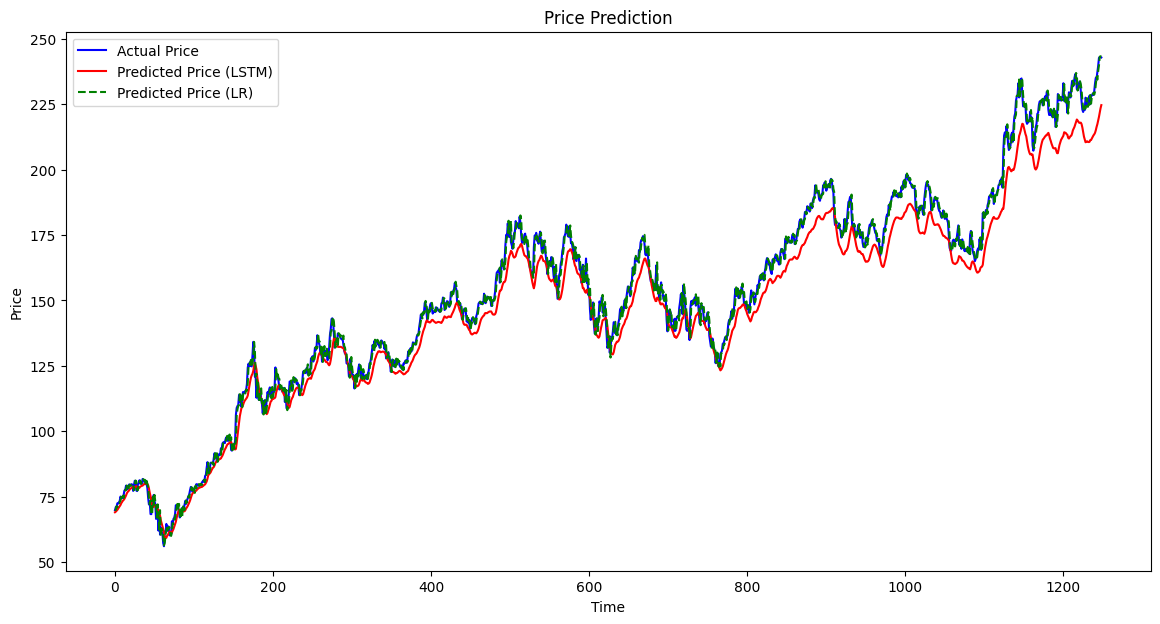

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and preprocess historical data
historical_data = pd.read_csv("historical_price_data.csv")
historical_data = historical_data[historical_data['Asset'] == "AAPL"]  # Select one asset for simplicity

# Use the 'Close' prices
close_prices = historical_data['Close'].values.reshape(-1, 1)

# Scaling data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Function to create lagged datasets
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# Prepare data with a look-back window of 30 days
look_back = 30
X, y = create_dataset(scaled_data, look_back)

# Reshape X for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



# Predict on test data
predictions_lstm = model_lstm.predict(X_test)
predictions_lstm = scaler.inverse_transform(predictions_lstm)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# **Model 2: Linear Regression**
# Initialize and fit a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train.reshape(-1, look_back), y_train)

# Predict using Linear Regression
predictions_lr = model_lr.predict(X_test.reshape(-1, look_back))
predictions_lr = scaler.inverse_transform(predictions_lr.reshape(-1, 1))

# Plot the predictions vs. actual prices for LSTM
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Price', color='blue')
plt.plot(predictions_lstm, label='Predicted Price (LSTM)', color='red')
plt.plot(predictions_lr, label='Predicted Price (LR)', color='green', linestyle='--')
plt.title('Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
